In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from bayes_opt import BayesianOptimization
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')

from numpy.random import seed
seed(42)

In [6]:
df = pd.read_csv('../pool_data_202211111622.csv')

In [7]:
df.head()

,pool_id,time_stamp,salinity,flow switch,flow meter,turbidity,ORP,PH,TDS,Pressure in tank,...,Shw msg,Drain,Human Counter,temperature,water level,cppm,phfeedtime,orpfeedtime,bather in from mens,bather in from ladies
0,10001,2022-11-01 11:01:16.220 -0400,287.175,NaN,NaN,9.51440,774.049,7.41573,287.175,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
1,10001,2022-11-01 11:01:26.323 -0400,287.175,NaN,NaN,9.35767,773.597,7.41573,287.175,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
2,10001,2022-11-01 11:01:36.386 -0400,287.121,NaN,NaN,9.35767,773.869,7.41889,287.121,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
3,10001,2022-11-01 11:01:46.498 -0400,287.248,NaN,NaN,8.57397,773.959,7.41193,287.248,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
4,10001,2022-11-01 11:01:56.554 -0400,287.175,NaN,NaN,8.88745,773.597,7.41699,287.157,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pool_id,43635.0,10001.000000,0.000000,10001.000000,10001.00000,10001.00000,10001.00000,10001.00000
salinity,43604.0,277.844371,7.997543,0.000000,273.95500,277.39100,281.46100,557.57500
flow switch,31.0,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000
flow meter,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
turbidity,43604.0,21.799282,71.822268,-4375.260000,22.02250,27.35210,33.30830,46.94560
ORP,43635.0,745.472058,53.136355,0.000000,741.40700,758.40600,766.36400,3002.87000
PH,43635.0,6.334087,2.650337,-11.099353,7.38977,7.41636,7.44927,20.74010
TDS,43604.0,277.844096,7.997437,0.000000,273.95500,277.39100,281.46100,557.57500
Pressure in tank,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure in,43604.0,2.518673,0.135535,-5.925750,2.51212,2.52206,2.52387,2.54503


In [9]:
deprecated_col = ['flow switch', 'flow meter', 'Pressure in tank', 'Shw msg', 'phfeedtime', 'orpfeedtime']

df = df.drop(deprecated_col, axis=1)
df.head()

,pool_id,time_stamp,salinity,turbidity,ORP,PH,TDS,Pressure in,Pressure out,Pump RPM,...,dis_feeder,ph_feeder,Fresh water,Drain,Human Counter,temperature,water level,cppm,bather in from mens,bather in from ladies
0,10001,2022-11-01 11:01:16.220 -0400,287.175,9.51440,774.049,7.41573,287.175,2.53581,2.53346,NaN,...,NaN,NaN,0.0,0.0,0.0,74.2574,500.0,NaN,NaN,NaN
1,10001,2022-11-01 11:01:26.323 -0400,287.175,9.35767,773.597,7.41573,287.175,2.53508,2.53382,NaN,...,NaN,NaN,0.0,0.0,0.0,74.2574,500.0,NaN,NaN,NaN
2,10001,2022-11-01 11:01:36.386 -0400,287.121,9.35767,773.869,7.41889,287.121,2.53526,2.53382,NaN,...,NaN,NaN,0.0,0.0,0.0,74.2574,500.0,NaN,NaN,NaN
3,10001,2022-11-01 11:01:46.498 -0400,287.248,8.57397,773.959,7.41193,287.248,2.53545,2.53382,NaN,...,NaN,NaN,0.0,0.0,0.0,74.2574,500.0,NaN,NaN,NaN
4,10001,2022-11-01 11:01:56.554 -0400,287.175,8.88745,773.597,7.41699,287.157,2.53508,2.53382,NaN,...,NaN,NaN,0.0,0.0,0.0,74.2574,500.0,NaN,NaN,NaN


Lets tidy up our data. cppm is calculated from ORP and thus is not necessary. We also do not have data for bather in from mens and bather in from ladies. We will remove these as well then look at missing values. Also `TDS` and `salinity` are always the same so we will keep just one. We will also drop the columns with no values or no count.

In [10]:
# Drop columns that have no data or are calculate from other columns

unnecessary_data = ['cppm', 'bather in from mens', 'bather in from ladies', 'Pump RPM', 'dis_feeder', 'ph_feeder', 
                   'Fresh water', 'Drain', 'salinity']

df = df.drop(unnecessary_data, axis=1)
df.columns

Index(['pool_id', 'time_stamp', 'turbidity', 'ORP', 'PH', 'TDS', 'Pressure in',
       'Pressure out', 'pump current', 'Human Counter', 'temperature',
       'water level'],
      dtype='object')

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pool_id,43635.0,10001.000000,0.000000,10001.000000,10001.00000,10001.00000,10001.00000,10001.00000
turbidity,43604.0,21.799282,71.822268,-4375.260000,22.02250,27.35210,33.30830,46.94560
ORP,43635.0,745.472058,53.136355,0.000000,741.40700,758.40600,766.36400,3002.87000
PH,43635.0,6.334087,2.650337,-11.099353,7.38977,7.41636,7.44927,20.74010
TDS,43604.0,277.844096,7.997437,0.000000,273.95500,277.39100,281.46100,557.57500
Pressure in,43604.0,2.518673,0.135535,-5.925750,2.51212,2.52206,2.52387,2.54503
Pressure out,43604.0,2.520375,0.057463,0.000000,2.51085,2.52044,2.52224,5.92575
pump current,43604.0,14.425126,892.269724,0.000000,0.00000,0.00000,0.00000,56183.10000
Human Counter,43604.0,7.148587,5.726768,0.000000,0.00000,6.00000,15.00000,15.00000
temperature,43635.0,74.219929,1.373040,0.000000,74.25740,74.25740,74.25740,74.25740


In [12]:
df = df.set_index('time_stamp')
df = df.sort_values(by='time_stamp')

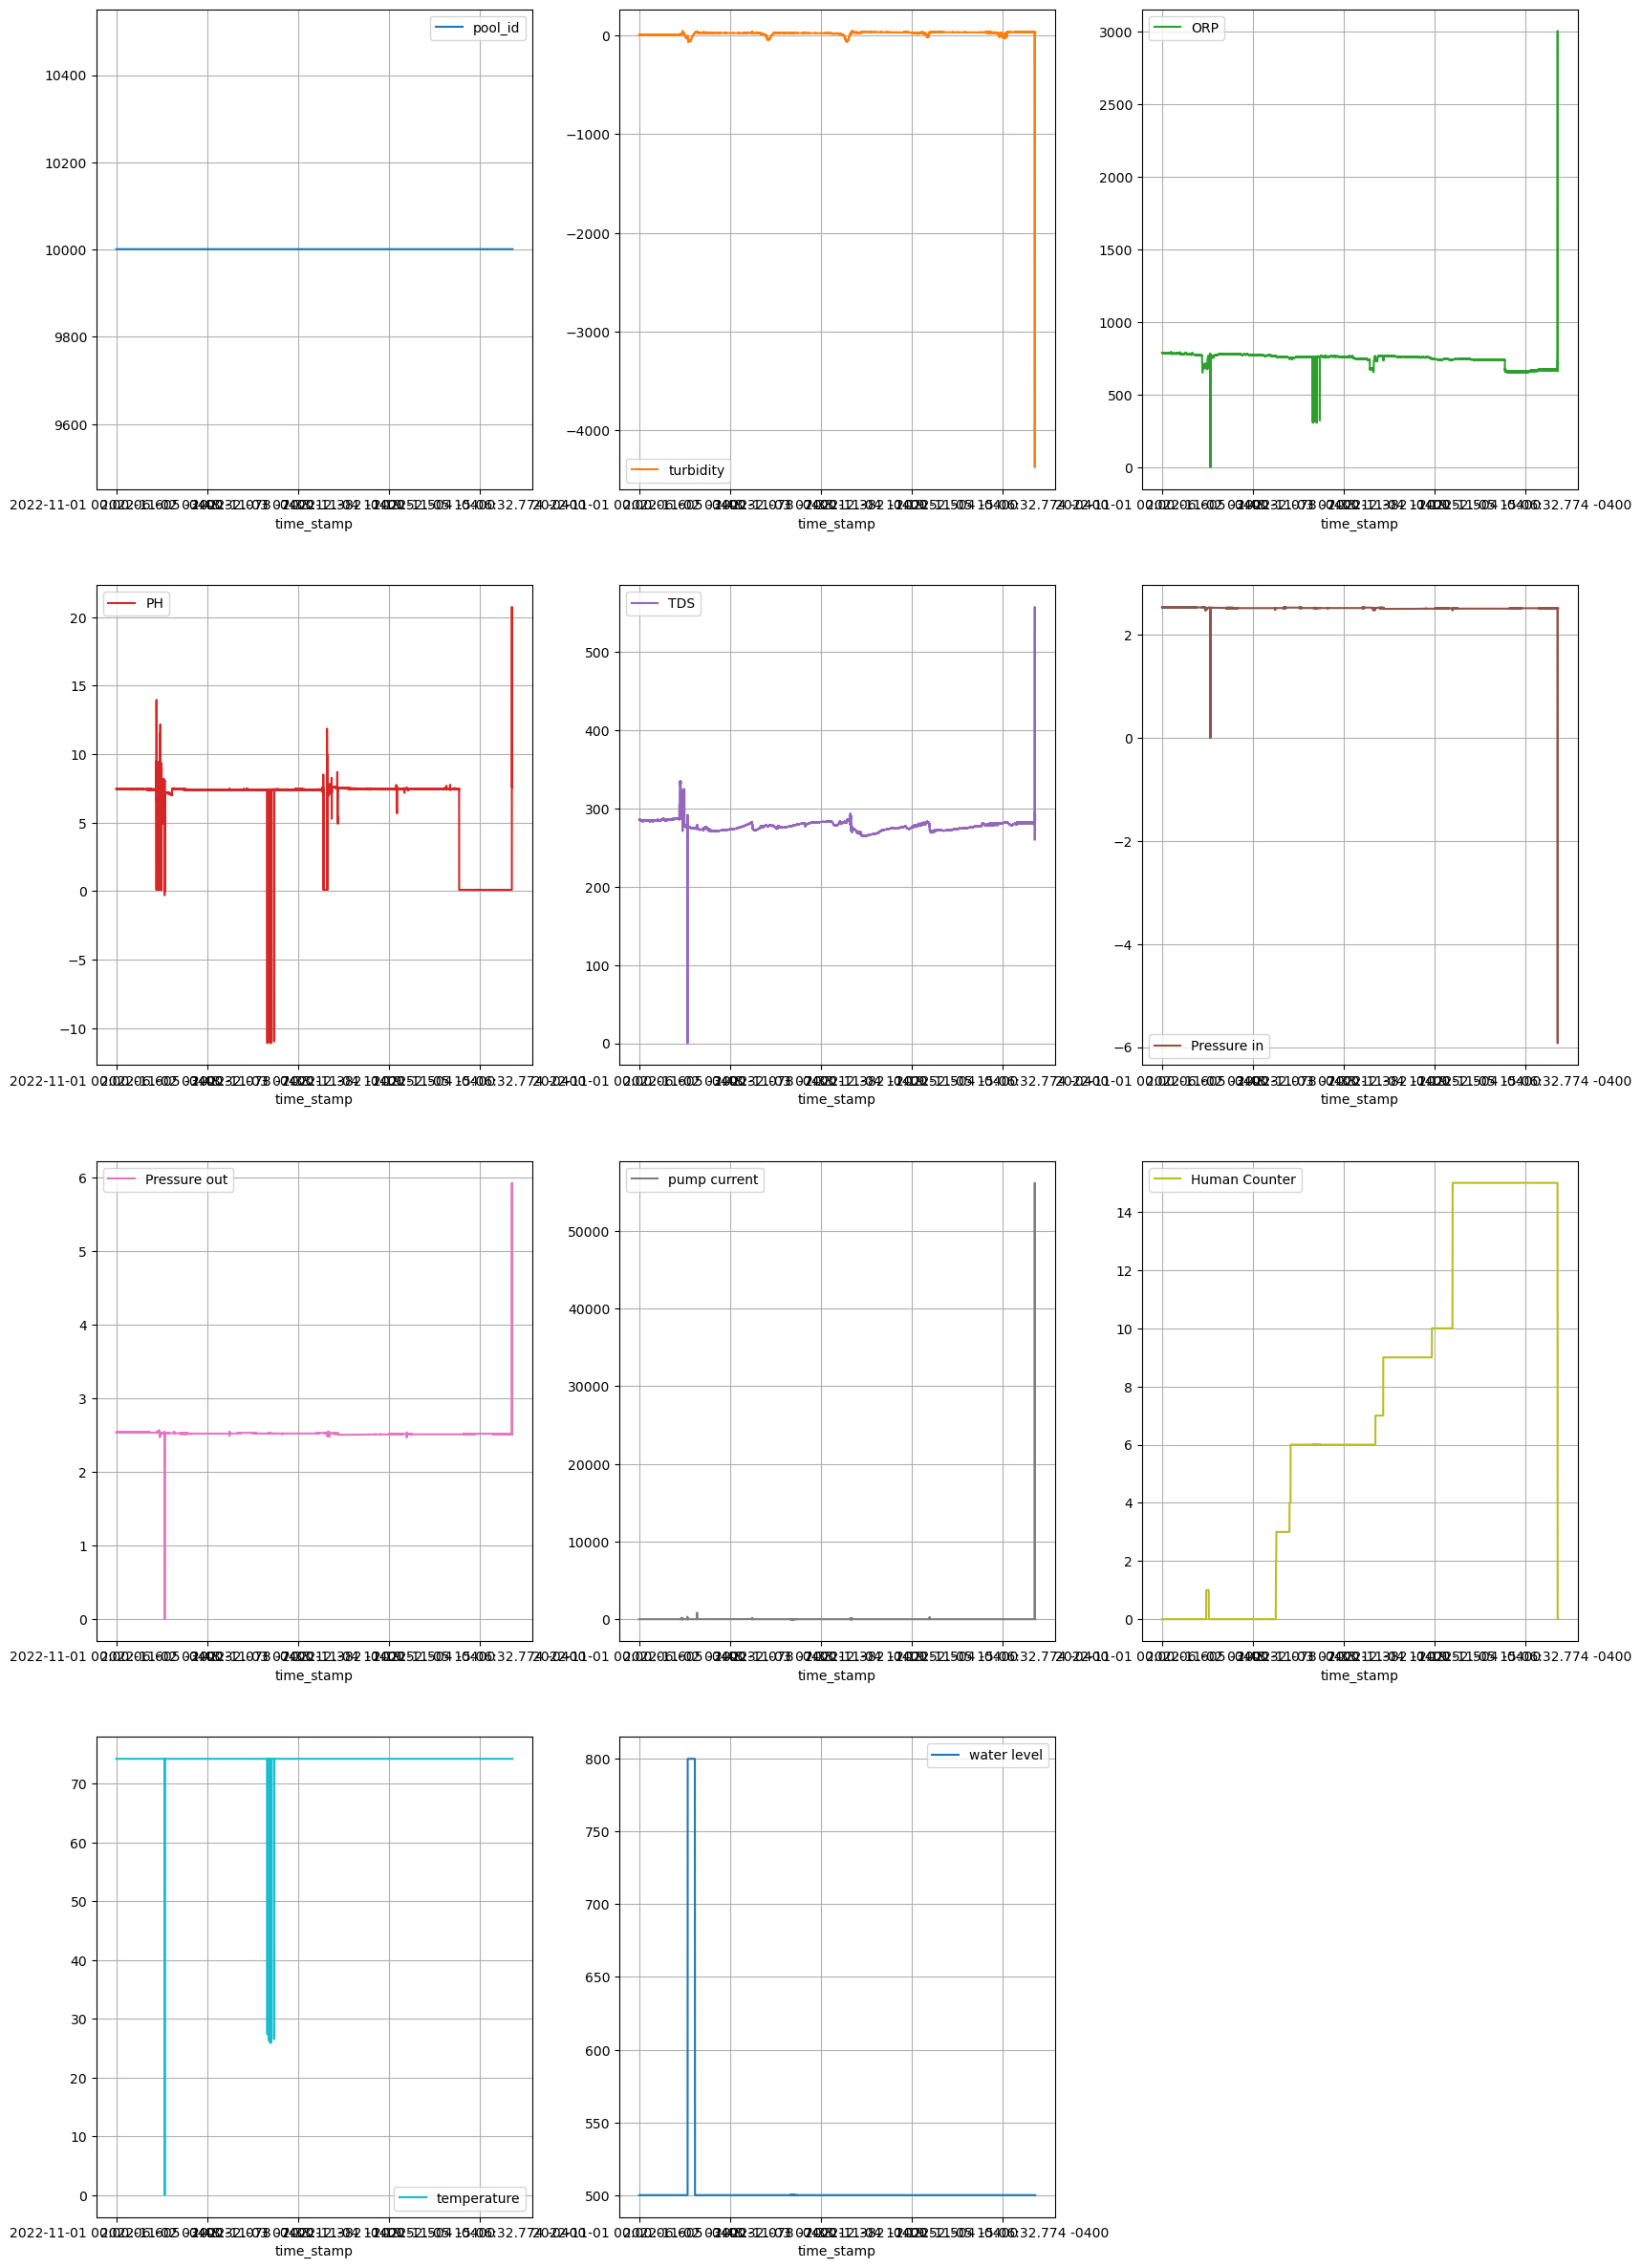

In [16]:
df.plot(subplots = True, grid = True, sharex=False, sharey=False,\
        layout = (int(len(df.columns)/3+1),3), figsize = (20,30));

We know that the sensor is supposed to only have a range from 0-14 so lets drop anything that is outside of that range as it is clearly a sensor issue.

In [15]:
df_clean = df[(df['PH'] >= 0) & (df['PH'] <= 14)]
df_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pool_id,43591.0,10001.000000,0.000000,10001.0000,10001.00000,10001.00000,10001.00000,10001.00000
turbidity,43591.0,22.910821,16.723076,-66.0706,22.02250,27.35210,33.30830,46.94560
ORP,43591.0,745.237901,37.273908,0.0000,741.40700,758.40600,766.36400,793.21900
PH,43591.0,6.343100,2.600508,0.0000,7.38977,7.41636,7.44927,13.95610
TDS,43591.0,277.773533,6.650318,0.0000,273.95500,277.39100,281.46100,335.06300
Pressure in,43591.0,2.520804,0.019392,0.0000,2.51212,2.52206,2.52387,2.54503
Pressure out,43591.0,2.519516,0.019386,0.0000,2.51085,2.52044,2.52224,2.56330
pump current,43591.0,0.251826,5.756234,0.0000,0.00000,0.00000,0.00000,837.24500
Human Counter,43591.0,7.150719,5.726291,0.0000,0.00000,6.00000,15.00000,15.00000
temperature,43591.0,74.253993,0.502981,0.0000,74.25740,74.25740,74.25740,74.25740


Realistically, we should only have a pH of around 7.2-7.8. Anything outside of that is dangerous and should not be allowed. For the sake of range however, we will keep everything from 7 pH to 8pH.

In [40]:
df_proper = df[(df['PH'] >= 7) & (df['PH'] <= 8)].copy()
df_proper.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pool_id,36667.0,10001.000000,0.000000e+00,10001.00000,10001.00000,10001.00000,10001.00000,10001.00000
turbidity,36667.0,22.947275,1.574392e+01,-66.07060,22.17920,27.03860,32.99490,46.94560
ORP,36667.0,759.705659,1.513900e+01,655.86700,746.38000,760.48600,771.06500,793.21900
PH,36667.0,7.426058,6.676988e-02,7.00370,7.40180,7.42522,7.45434,7.98032
TDS,36667.0,276.966702,5.693086e+00,259.85000,273.16000,276.18000,280.90000,335.00900
Pressure in,36667.0,2.521364,9.401549e-03,2.48011,2.51230,2.52242,2.52695,2.54069
Pressure out,36667.0,2.520008,9.373683e-03,2.46727,2.51103,2.52080,2.52568,2.54593
pump current,36667.0,0.155643,5.293664e+00,0.00000,0.00000,0.00000,0.00000,837.24500
Human Counter,36667.0,6.036981,5.206010e+00,0.00000,0.00000,6.00000,9.00000,15.00000
temperature,36667.0,74.257400,2.188501e-12,74.25740,74.25740,74.25740,74.25740,74.25740


In [41]:
# we will now drop values that are constant after cleaning and then we'll visualize the data

constant = ['pool_id', 'temperature']
df_proper.drop(constant, axis=1,inplace=True)

In [42]:
df_proper.head()

,turbidity,ORP,PH,TDS,Pressure in,Pressure out,pump current,Human Counter,water level
time_stamp,,,,,,,,,
2022-11-01 00:00:06.605 -0400,6.53613,788.607,7.46826,285.584,2.53725,2.53545,0.0,0.0,500.0
2022-11-01 00:00:16.661 -0400,6.37939,788.879,7.46067,285.638,2.53780,2.53617,0.0,0.0,500.0
2022-11-01 00:00:26.768 -0400,5.75244,788.336,7.42585,285.873,2.53870,2.53743,0.0,0.0,500.0
2022-11-01 00:00:36.834 -0400,5.59570,788.065,7.43408,285.855,2.53852,2.53743,0.0,0.0,500.0
2022-11-01 00:00:46.936 -0400,5.59570,788.879,7.43345,285.765,2.53870,2.53725,0.0,0.0,500.0


<AxesSubplot:ylabel='Count'>

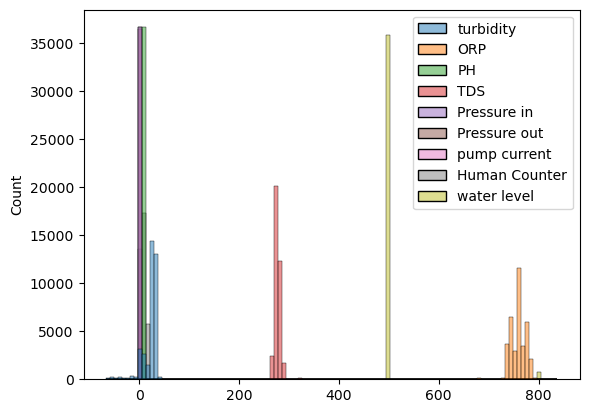

In [45]:
plt.figure()
sns.histplot(df_proper)

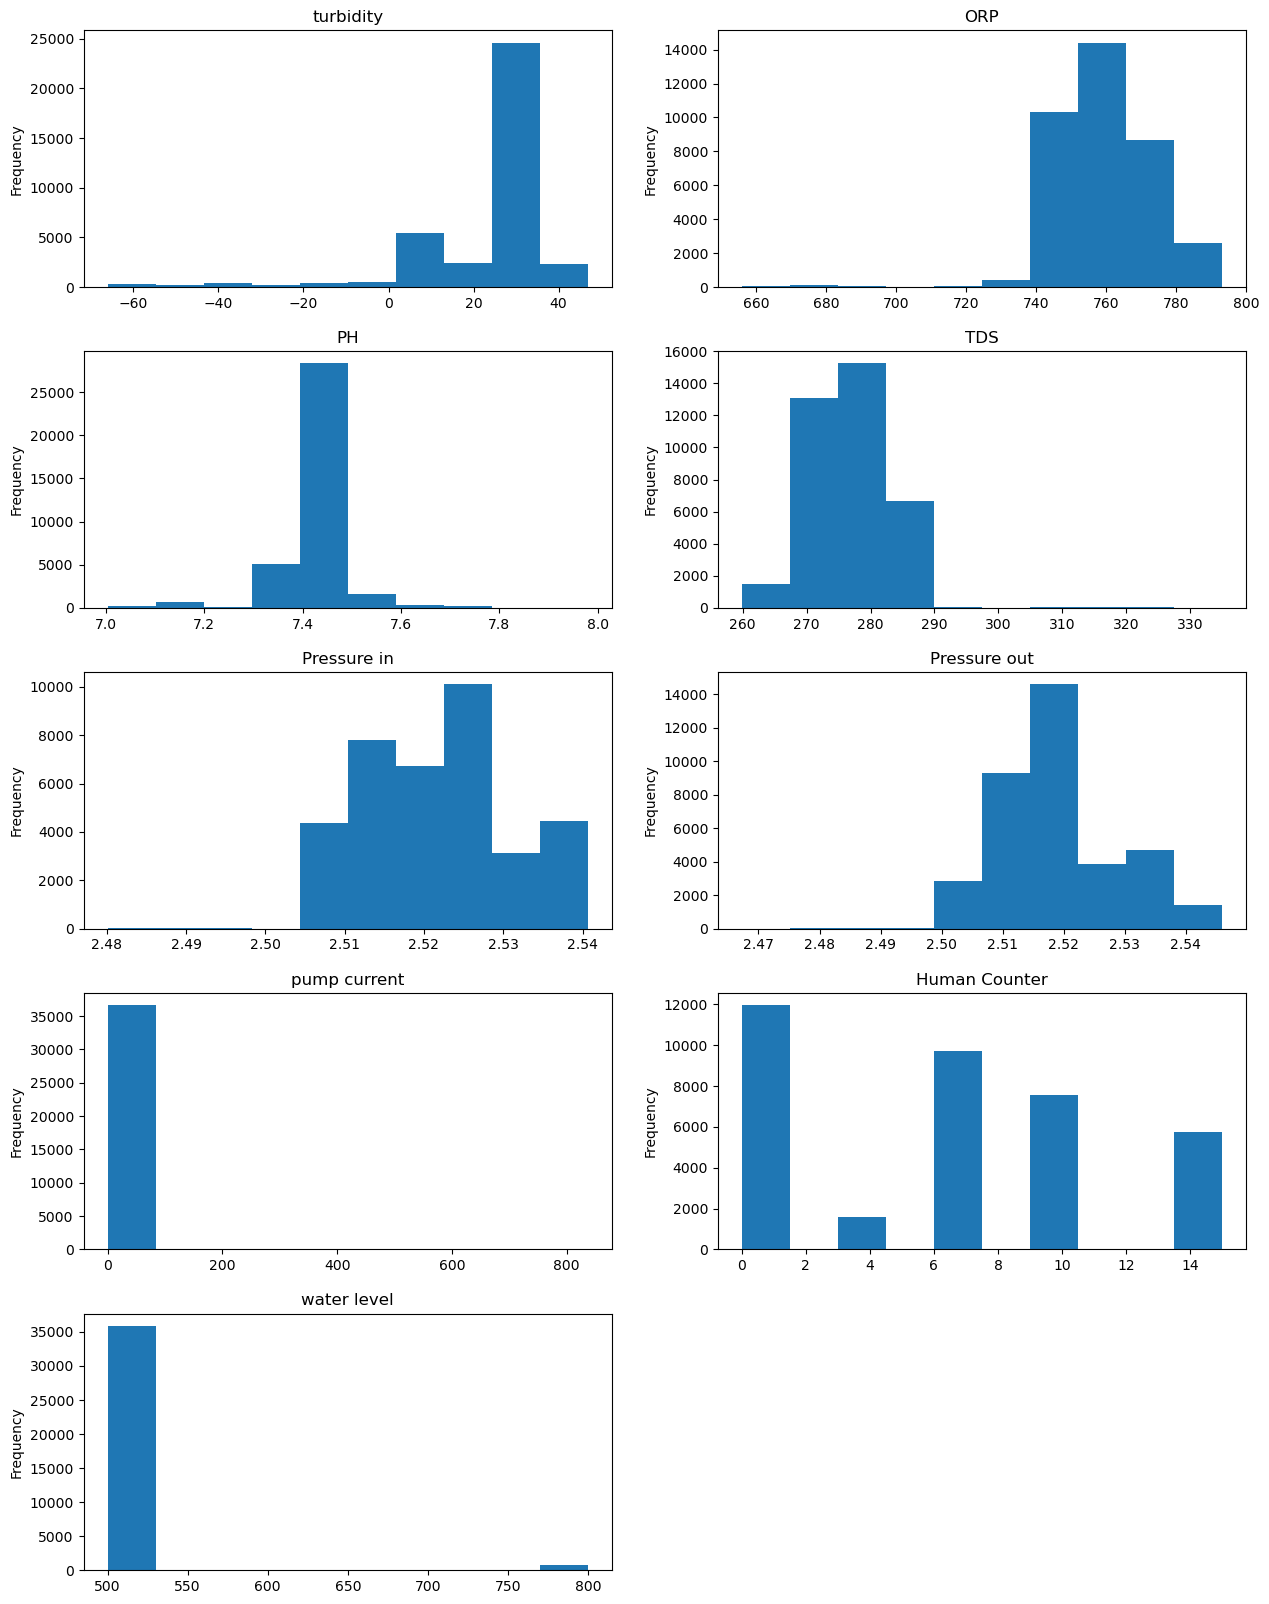

In [61]:
plt.figure(figsize = (15,20))
plt.subplots_adjust(hspace=0.25)

i=0

for col in df_proper.columns:
    i += 1
    ax = plt.subplot(5,2,i)
    df_proper[col].plot(kind = 'hist', ax = ax, title = col)

<AxesSubplot:>

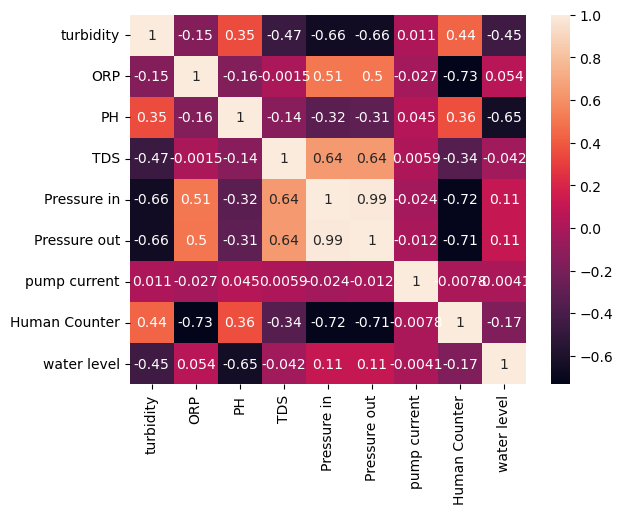

In [62]:
sns.heatmap(df_proper.corr(),annot=True)

In [78]:
# Rename column names
df_proper.columns = df_proper.columns.str.replace(' ', '_')
df_proper.columns

Index(['turbidity', 'ORP', 'PH', 'TDS', 'Pressure_in', 'Pressure_out',
       'pump_current', 'Human_Counter', 'water_level'],
      dtype='object')

In [178]:
df_proper.dtypes

turbidity        float64
ORP              float64
PH               float64
TDS              float64
Pressure_in      float64
Pressure_out     float64
pump_current     float64
Human_Counter    float64
water_level      float64
dtype: object

In [79]:
X = df_proper.drop('PH', axis=1)
y = df_proper['PH']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [179]:
train_data = lgb.Dataset(X_train, y_train, free_raw_data=False)
validation_data = lgb.Dataset(X_test, reference=train_data, free_raw_data=False)

In [180]:
num_iterations = 500

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbose':-1,
}

In [183]:
# First we try with just a default lgbm with no changing parameters
bst = lgb.train(params, train_data, valid_sets=[validation_data], verbose_eval=-1, keep_training_booster=True);

In [184]:
eval_score = bst.eval_train()[0]
lgbm_rms = {}
lgbm_rms['initial_lgbm_train'] = eval_score[2]
lgbm_rms

{'initial_lgbm_train': 0.015265157426982688}

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

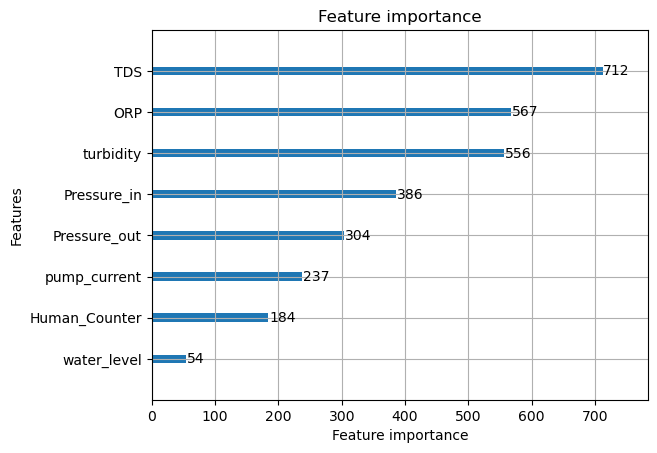

In [185]:
lgb.plot_importance(bst)

In [186]:
y_pred = bst.predict(X_test)

In [187]:
lgbm_rms['initial_lgbm_test'] = mean_squared_error(y_test, y_pred, squared=False)
lgbm_rms

{'initial_lgbm_train': 0.015265157426982688,
 'initial_lgbm_test': 0.01871304139955897}

In [191]:
r2_score(y_test, y_pred)

0.9194145554542847

In [192]:
mean_squared_error(y_test,y_pred, squared=False)

0.01871304139955897

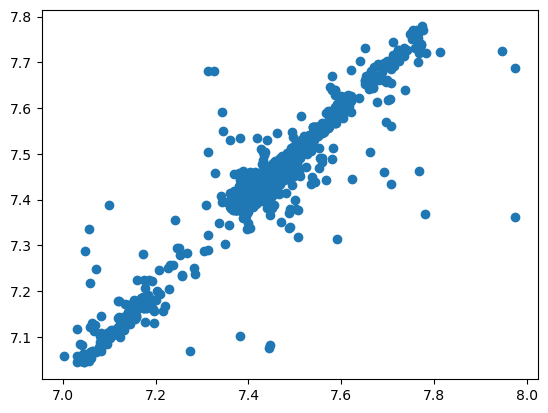

In [194]:
plt.scatter(x=y_test, y=y_pred)

In [195]:
def lgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds), True

In [258]:
def hyp_lgbm(num_leaves, feature_fraction, bagging_fraction, max_depth, min_split_gain, min_child_weight, learning_rate):
      
        params = {'application':'regression', 'num_iterations': 5000,
                    'early_stopping_round':500, 'learning_rate': 0.05,
                  'metric':'rmse', 'verbose':-1} # Default parameters
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['min_split_gain'] = min_split_gain
        params['min_child_weight'] = min_child_weight
        params['learning_rate'] = learning_rate
        cv_results = lgb.cv(params, train_data, nfold=5, seed=17,categorical_feature=[], stratified=False,
                            verbose_eval=None)
        # print(cv_results)
        return -np.min(cv_results['rmse-mean'])

In [259]:
pds = {'num_leaves': (10, 200),
          'feature_fraction': (0.1, 0.9),
          'bagging_fraction': (0.8, 1),
          'max_depth': (9, 13 ),
          'min_split_gain': (0.001, 0.1),
          'min_child_weight': (30, 50),
           'learning_rate': (0.01, 0.1)
      }

In [260]:
# Surrogate model
optimizer = BayesianOptimization(hyp_lgbm,pds,random_state=7)
                                  
# Optimize
optimizer.maximize(init_points=15, n_iter=35)

|   iter    |  target   | baggin... | featur... | learni... | max_depth | min_ch... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------------------
|  1        | -0.0259   |  0.8153   |  0.7239   |  0.04946  |  11.89    |  49.56    |  0.05431  |  105.2    |
|  2        | -0.02706  |  0.8144   |  0.3148   |  0.05499  |  11.72    |  46.07    |  0.03871  |  22.53    |
|  3        | -0.02231  |  0.8576   |  0.8277   |  0.0292   |  10.81    |  48.62    |  0.003465 |  124.1    |
|  4        | -0.02817  |  0.99     |  0.2842   |  0.05936  |  12.64    |  32.66    |  0.05282  |  152.6    |
|  5        | -0.02511  |  0.9338   |  0.4742   |  0.02844  |  10.96    |  37.45    |  0.04826  |  79.52    |
|  6        | -0.02454  |  0.9676   |  0.7149   |  0.03826  |  11.29    |  35.52    |  0.04583  |  77.07    |
|  7        | -0.02851  |  0.9315   |  0.3963   |  0.05132  |  11.88    |  38.26    |  0.09074  |  44.29    |
|  8      

|  45       | -0.02478  |  0.9332   |  0.4516   |  0.0696   |  11.24    |  34.66    |  0.04193  |  24.36    |
|  46       | -0.021    |  0.8916   |  0.4712   |  0.06353  |  11.81    |  35.63    |  0.001    |  24.48    |
|  47       | -0.02168  |  1.0      |  0.9      |  0.1      |  13.0     |  50.0     |  0.001    |  129.4    |
|  48       | -0.02508  |  0.9551   |  0.6562   |  0.07184  |  12.72    |  35.53    |  0.03993  |  24.58    |
|  49       | -0.02205  |  0.9384   |  0.8959   |  0.02272  |  11.51    |  35.01    |  0.006343 |  131.3    |
|  50       | -0.0229   |  0.9268   |  0.6597   |  0.04127  |  11.75    |  34.03    |  0.01424  |  130.6    |


In [261]:
optimizer.max['params']

{'bagging_fraction': 0.8915671942541271,
 'feature_fraction': 0.4712123963180773,
 'learning_rate': 0.06352990454024313,
 'max_depth': 11.813260226509687,
 'min_child_weight': 35.63214612660663,
 'min_split_gain': 0.001,
 'num_leaves': 24.47910734304996}

In [262]:
tuned_params = optimizer.max['params']
tuned_params['num_leaves'] = int(tuned_params['num_leaves'])
tuned_params['max_depth'] = int(tuned_params['max_depth'])
tuned_params['metric'] = 'rmse'

In [263]:
tuned_bst = lgb.train(tuned_params, train_data, valid_sets=[validation_data], verbose_eval=-1, keep_training_booster=True)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1175
[LightGBM] [Info] Number of data points in the train set: 25666, number of used features: 8
[LightGBM] [Info] Start training from score 7.425877
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [265]:
tuned_eval = tuned_bst.eval_train()[0]
lgbm_rms['tuned_lgbm_train'] = tuned_eval[2]
lgbm_rms

{'initial_lgbm_train': 0.015265157426982688,
 'initial_lgbm_test': 0.01871304139955897,
 'tuned_lgbm_train': 0.018595815688158164}

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

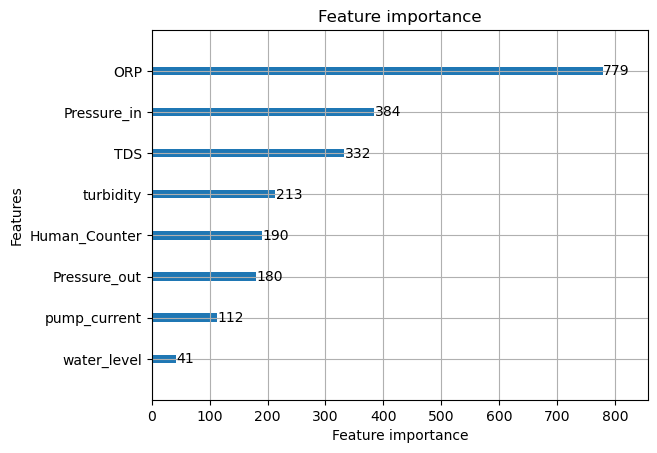

In [268]:
lgb.plot_importance(tuned_bst)

In [266]:
y_tuned_pred = tuned_bst.predict(X_test)

In [269]:
r2_score(y_test, y_tuned_pred)

0.9048201312648722

In [270]:
mean_squared_error(y_test,y_tuned_pred, squared=False)

0.02033708136407469

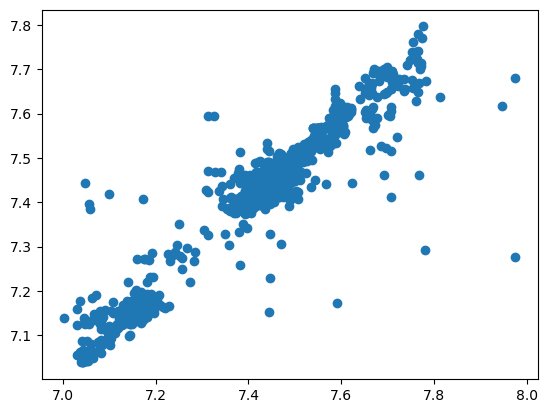

In [271]:
plt.scatter(x=y_test, y=y_tuned_pred)